<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Graphical-Methods-(Visual-checks)" data-toc-modified-id="Graphical-Methods-(Visual-checks)-1">Graphical Methods (Visual checks)</a></span><ul class="toc-item"><li><span><a href="#Histogram,-KDE" data-toc-modified-id="Histogram,-KDE-1.1">Histogram, KDE</a></span></li><li><span><a href="#Q-Q-plot" data-toc-modified-id="Q-Q-plot-1.2">Q-Q plot</a></span></li></ul></li><li><span><a href="#Statistical-tests-to-test-the-normality" data-toc-modified-id="Statistical-tests-to-test-the-normality-2">Statistical tests to test the normality</a></span><ul class="toc-item"><li><span><a href="#Shapiro–Wilk-test" data-toc-modified-id="Shapiro–Wilk-test-2.1">Shapiro–Wilk test</a></span></li><li><span><a href="#Kolmogorov-Smirnov-test-and-Lilliefors-test" data-toc-modified-id="Kolmogorov-Smirnov-test-and-Lilliefors-test-2.2">Kolmogorov-Smirnov test and Lilliefors test</a></span></li><li><span><a href="#Cramér–von-Mises-test-and-Anderson–Darling-test." data-toc-modified-id="Cramér–von-Mises-test-and-Anderson–Darling-test.-2.3">Cramér–von Mises test and Anderson–Darling test.</a></span></li></ul></li><li><span><a href="#Final-Notes-:" data-toc-modified-id="Final-Notes-:-3">Final Notes :</a></span><ul class="toc-item"><li><span><a href="#Summary-of-Test-Result" data-toc-modified-id="Summary-of-Test-Result-3.1">Summary of Test Result</a></span></li><li><span><a href="#Questions" data-toc-modified-id="Questions-3.2">Questions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-3.3">References</a></span></li></ul></li></ul></div>

In statistics, many statistical tests and procedures are based on specific distributional assumptions. The assumption of normality is particularly common in classical statistical tests. Normality tests are used to determine if a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed. 

Here I just wanted to run few normality tests in **python** and make notes on their advantages and limitations. So that this notebook can be useful as a reference whenever required. My journey for knowing more about the normality tests is begin by asking myself the question "Why there are so many normality tests?"

Eventually, I was curious to know the answers for these questions too.

- Why can't we make decision about the normality of our sample by just checking the sample mean,median,mode,variance,skewness, kurtosis?
- For what criteria we should look while choosing the normality test?
- What is the best test for normality?

One can get answers for the above questions in this notes, started with running each normality test and answered the above questions at last. I will keep updating this notebook when ever I learn a new normality test and try to make notes on its limitations and advantages.

# Graphical Methods (Visual checks)

## Histogram, KDE

As we know the normal distribution is symmetric and bell shaped. A simple method to test the normality is to observe the distribution of the sample data by the histogram.

In [211]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

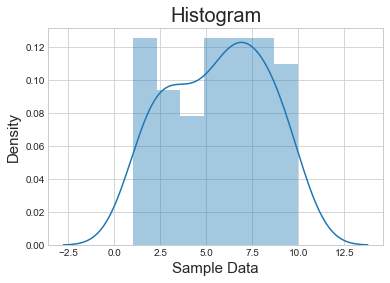

In [212]:
from math import sqrt
n=300 # Sample size
data=np.random.uniform(low=1,high=10,size=n) # Sample
#data=np.random.normal(loc=0,scale=10,size=n)
bin_value=int(sqrt(len(data))) #choosing the number of bins to draw histogram
sns.distplot(data,bins=bin_value);
plt.xlabel("Sample Data",size=15);
plt.ylabel("Density",size=15);
plt.title("Histogram",size=20);
plt.show()

- From the histogram we can clearly say the sample is not normally distributed.
- But based on histogram, we **can't always be sure** to judge that the sample data is normally distributed or not, even when the histogram gives a signal that it is normal. The science of data was not allowing to do so. Click [here](https://stats.stackexchange.com/questions/51718/assessing-approximate-distribution-of-data-based-on-a-histogram/51753#51753) to know **why**.
- One can consider the **KDE**(the line drawn in the plot), as an alternative(which reduces the arbitrariness of histograms) to test the normality for the given sample.
- KDE also not preferred to test the normality when the sample size is small. 
- In practical situations one can't be come to the conclusion about the normality by just checking the KDE/histogram. Check [this](https://stats.stackexchange.com/questions/129417/if-my-histogram-shows-a-bell-shaped-curve-can-i-say-my-data-is-normally-distrib?noredirect=1&lq=1) for more information.
- But this is the **most important** step to choose an appropriate normality test as it describes how the sample data is distributed.

## Q-Q plot

A Q–Q plot is used to compare the shapes of distributions, providing a graphical view of how properties such as location, scale, and skewness are similar or different in the two distributions. The use of Q–Q plots to compare two samples of data can be viewed as a **non-parametric approach** to comparing their underlying distributions. A Q–Q plot is generally a more powerful approach to do this than the common technique of comparing histograms of the two samples. Q–Q plots are also commonly used to compare a data set to a theoretical model by plotting their quantiles against each other. For normality test we compare our ordered sample data with the quantiles obtained from the standard normal distribution. Thus, Q–Q plot help us to identify substantive departures from normality. The resulting image look close to a straight line if the data are approximately normally distributed. Deviations from a straight line suggest departures from normality. **The main step in constructing a Q–Q plot is calculating or estimating the quantiles to be plotted.** To know how the quantiles are generated in scipy.stats.probplot() see [this](https://github.com/ThisIsVenkatesh/Normality-Tests/blob/master/Tests/QQ%20plot.ipynb) notebook.

**Note**: The normal probability plot is a special case of the Q–Q probability plot for a normal distribution.

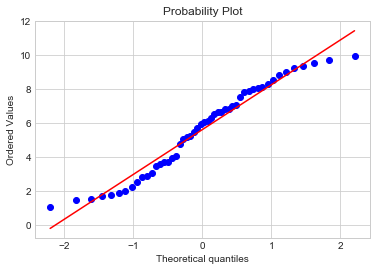

In [213]:
import scipy.stats as stats
stats.probplot(data, dist="norm", plot=plt);

- This method is not preferred if the sample size is small.
- **If the sample size is sufficiently large** most statistical significance tests may detect even trivial departures from the null hypothesis (i.e., although there may be some statistically significant effect, **it may be too small to be of any practical significance**); thus, additional investigation of the effect size is typically advisable, like a Q–Q plot. So, if we have sufficiently large sample, we can opt this method **instead of statistical significance tests**. For more information check this [link](https://stats.stackexchange.com/questions/2516/are-large-data-sets-inappropriate-for-hypothesis-testing) and this [link](https://stats.stackexchange.com/questions/2492/is-normality-testing-essentially-useless).
- As it needs the visual inspection, if we don't have enough sample, it is trickier to make conclusions.

# Statistical tests to test the normality

Note: To understand the following concepts clearly, knowing about some inferential statistical terms like test statistic,null distribution, power,p-value,critical values will helps a lot. Here I didn't provided the formulas of the test statistic. To know about the formula for a specific test statistic please refer their wikipedia page.

## Shapiro–Wilk test

The Shapiro–Wilk test tests the null hypothesis that a sample x1, ..., xn came from a normally distributed population. The Shapiro-Wilk test is for testing **normality with unspecified μ and σ**, i.e., the sample is from a normal distribution with unknown mean μ and unknown SD σ. This test exhibiting high _power_( probability that the test rejects the null hypothesis (H0) when a specific alternative hypothesis (H1) is true.), leading to good results **even with a small number of observations.**

H0 : X ∼ N(μ, σ)

H1 : X ≁ N(μ, σ)

**Test Statistic**: The test statistic is obtained by dividing the square of an appropriate linear combination of the sample order statistics by the usual symmetric estimate of variance. It may be noted that if one is indeed sampling from a normal population then the numerator, $b^2$, and denominator, $S^2$,of $W$(test Statistic) are both, up to a constant, estimating the **same quantity, namely σ**.

In [214]:
from scipy.stats import shapiro
Shapiro_statistic_value, Shapiro_p_value = shapiro(data)
print(Shapiro_statistic_value, Shapiro_p_value)

0.9514369964599609 0.03909415379166603


- Initially this test is feasible to apply for only small samples(<=50). But after Royston proposed an alternative method of calculating the coefficients vector by providing an algorithm for calculating values, which extended the sample size to 2,000. This technique is used in several software packages. Rahman and Govindarajulu extended the sample size further up to 5,000.

- In python this test is not recommended to use if the sample size is above 5000. For N > 5000 the $W$ test statistic is accurate but the p-value may not be.
(The accuracy of the p-value depends on **how close** the assumed distribution is **to the true distribution of the test statistic** under the null hypothesis.)

- This test is not recommended to use if the data set has many identical values.
- Shapiro–Wilk has the best power under a broad range of useful alternatives for a given significance, when comparing with Anderson–Darling , Kolmogorov–Smirnov, Lilliefors tests.
- Recommended when we don't have a particular alternative distribution in mind.

## Kolmogorov-Smirnov test and Lilliefors test

The Kolmogorov-Smirnov (K-S) test is a non-parametric test based on the empirical distribution function (ECDF).

There are two standard versions of the Kolmogorov-Smirnov test:

1. The one-sample KS, which tests if a sample of points X1,…,Xn∈R fits a specific continuous distribution function F.
2. The two-sample KS, which tests whether it is reasonable to assume that two sets of samples X1,…,Xn and Y1,…,Ym come from the same continuous distribution.

So, The Kolmogorov–Smirnov test can be serve as a goodness of fit test(one-sample case). In the special case of testing for normality of the distribution


H0 : X ∼ N(μ, σ) with specified μ, σ

H1 : X ≁ N(μ, σ)

In general samples are **standardized and compared with a standard normal distribution(i.e., with specified mean(0) and variance(1))**. 

**Test statistic**:The Kolmogorov–Smirnov statistic **measures the supremum (greatest) distance** between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution(standard normal distribution in our case for testing normality). If the sample comes from the referenced distribution F(x), then  the test statistic converges to 0 almost.

**The null distribution of this statistic** calculated under the null hypothesis that the sample is drawn from the reference distribution **converges to the Kolmogorov distribution**.

The goodness-of-fit test or the Kolmogorov–Smirnov test can be constructed by using the critical values of the Kolmogorov distribution. This test is asymptotically valid when n tends to infinity.

In [230]:
standardized_data=(data-np.mean(data))/np.std(data)
ks_statistic,ks_p_value=stats.kstest(standardized_data, 'norm')#Compared with standard normal distribution
ks_statistic,ks_p_value

(0.0877663793429096, 0.8358855576265144)

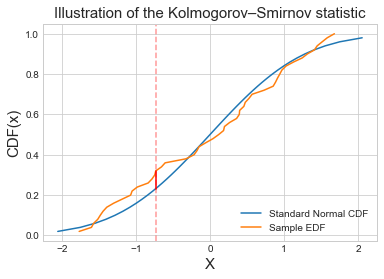

In [216]:
# By now, we had known the value of maximum distance. If you are intrested in knowing where it is located.
# Consider this code

probs=np.arange(1, n+1)/n # n - sample size
stzd_data=np.sort(standardized_data)
theoretical_values=stats.norm.ppf(probs)
est_probs=np.interp(stzd_data,theoretical_values,probs)
max_id=np.argmax((probs-est_probs)**2)
plt.plot(theoretical_values,probs,label='Standard Normal CDF')
plt.plot(stzd_data,probs,label='Sample EDF')
plt.axvline(stzd_data[max_id], color="red", linestyle="dashed", alpha=0.4)
plt.plot([stzd_data[max_id], stzd_data[max_id]], [probs[max_id], est_probs[max_id]], color="red")
plt.xlabel('X',size=15)
plt.ylabel('CDF(x)',size=15)
plt.title('Illustration of the Kolmogorov–Smirnov statistic',size=15)
plt.legend()
plt.show()

**<u>Test with estimated parameters (Special case):</u>** 
If either the form or the parameters of F(x) are determined **from the data $X_i$** the critical values determined in this way are invalid. In such cases, Monte Carlo or other methods may be required, but tables have been prepared for some cases. Details for the **required modifications to the test statistic** and for the critical values **for the normal distribution** and the exponential distribution have been published. The Lilliefors test represents a special case of this **for the normal distribution**.

**Lilliefors test**:

The Lilliefors test is a normality test based on the Kolmogorov–Smirnov test. It is used to test the null hypothesis that data come from a normally distributed population, when the null hypothesis does not specify _which normal distribution_; i.e., it does not specify the expected value and variance of the distribution.

Instead of comparing the standardized data with the standard normal distribution, we will compare the sample data by the normal distribution with the **estimated mean and estimated variance**. The test statistic will be same that used in Kolmogorov–Smirnov test.

This is where this test becomes more complicated than the Kolmogorov–Smirnov test. Since the hypothesised CDF has been moved closer to the data by estimation based on those data, the maximum discrepancy has been made smaller than it would have been if the null hypothesis had singled out just one normal distribution. **Thus the "null distribution" of the test statistic**, i.e., its probability distribution assuming the null hypothesis is true, is stochastically smaller than the Kolmogorov–Smirnov distribution. This is the **Lilliefors distribution**.


In [217]:
import statsmodels.api as sm
Lilliefors_statistic,Lilliefors_p_value=sm.stats.diagnostic.lilliefors(data,'norm')
Lilliefors_statistic,Lilliefors_p_value

(0.08551584343915586, 0.2)

In [231]:
stats.kstest(data,'norm',args=(np.mean(data),np.std(data,ddof=1))) 
#One can obsserve the value of test statistic is same for KS test,Lilliefors test, But the p-values are different.

KstestResult(statistic=0.08551584343915586, pvalue=0.8580146043731369)

- For KS test, the asymptotic power of this test is 1.
- **Perhaps** the limitation is that the distribution must be fully specified.
- KS test can be appropriate to test the distribution of errors is normally distributed with mean 0 or not, to make decisions about the process.
- It tends to be **more sensitive near the center of the distribution than at the tails**. If there are repeated deviations between the EDFs, or the EDFs have (or are adjusted to have) the same mean values, then the EDFs cross each other multiple times and the maximum deviation between the distributions is reduced. The Cramer-von Mises (CvM) test  that measures the sum of square deviations between the EDFs treats this case well.

## Cramér–von Mises test and Anderson–Darling test.

**Cramér–von Mises test**: To simply describe, In KS test only the maximum distance is considered as test statistic. But, In Cramér–von Mises test, the test statistic will be based on all the deviations and it is sum of squares of the deviations. Empirical evidences suggest that the Cramér–von Mises test is usually more powerful than the Kolmogorov–Smirnov test for a broad class of alternative hypothesis.

In [219]:
from skgof import cvm_test
CvM_statistic,CvM_pvalue=cvm_test(standardized_data,'norm')
CvM_statistic,CvM_pvalue

(0.1030387586389505, 0.5719528490623985)

But both the KS and CvM statistics are insensitive when the differences between the curves is most prominent near the beginning or end of the distributions. This is because, by construction, the EDFs converge to 0.0 and 1.0 at the ends and any deviations must be small. To know more about this click [here](https://stats.stackexchange.com/questions/437979/limitations-of-kolmogorov-smirnov-test).

The Anderson-Darling (AD) test was developed in the 1950s as a weighted CvM test to overcome this problem.

**Anderson-Darling (AD) test**:

Compared with the Cramér–von Mises test, K-S test the Anderson–Darling distance places more weight on observations in the tails of the distribution. If we calculate a weighted version of the Cramér-von Mises (with weights inversely proportional to this variance) then we end up with the Anderson-Darling statistic. The K-S test is distribution free in the sense that the critical values do not depend on the specific distribution being tested. The Anderson-Darling test makes use of the specific distribution in calculating critical values. The Anderson-Darling test is an alternative to the chi-square and Kolmogorov-Smirnov goodness-of-fit tests. We can use the Anderson-Darling statistic to compare how well a data set fits different distributions. Kolmogorov-Smirnov test taken the maximum difference between the EDF curves, in Anderson-Darling test will consider all the differences.Overall Anderson-Darling test is more powerful than Kolmogorov-Smirnov test because of the more detailed comparison it does.

In [233]:
AD_result = stats.anderson(data) #The sample data will standardized and compare with N(0,1)
print(AD_result)
print('-'*20)
for i in range(len(AD_result.critical_values)):
    sl, cv = AD_result.significance_level[i], AD_result.critical_values[i]
    if AD_result.statistic < AD_result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

AndersonResult(statistic=0.6623675992821632, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
--------------------
15.000: 0.538, data does not look normal (reject H0)
10.000: 0.613, data does not look normal (reject H0)
5.000: 0.736, data looks normal (fail to reject H0)
2.500: 0.858, data looks normal (fail to reject H0)
1.000: 1.021, data looks normal (fail to reject H0)


In [221]:
AD_result.statistic,AD_result.significance_level,AD_result.critical_values

(0.6623675992821632,
 array([15. , 10. ,  5. ,  2.5,  1. ]),
 array([0.538, 0.613, 0.736, 0.858, 1.021]))

In [222]:
# To conduct AD test with unknown mean and variance use this method 
# statsmodels.stats.diagnostic.normal_ad() the estimates for parameters will obtained from sample

Code taken from [here](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)         

- Efficient for small samples(n>8) too.
- You can adjust the Anderson-Darling test statistic under the estimation of parameters from the sample for testing of normality
- If we observe the the distribution of sample has the heavier tail, this is considered to be best test.

# Final Notes :

## Summary of Test Result

- One of the reason to create this notebook is most of the analysts are recommended to run more than one test when ever we are looking for normality tests. Lets see the results of different normality tests for our sample data. 

- There are few other tests based on sample skewness and kurtosis, entropy etc. I didn't explained them here. I will keep updating this notebook when ever I learn a new normality test and try to make notes on its limitations and advantages.

In [235]:
import pandas as pd

df=pd.DataFrame([{'SW (n<5000))':Shapiro_p_value,'KS':ks_p_value, 'L':Lilliefors_p_value, 'CvM':CvM_pvalue}])
AD_SL=pd.Series(AD_result.significance_level)
AD_CV=pd.Series(AD_result.critical_values)
AD_statistic=pd.Series([AD_result.statistic]*len(AD_result.critical_values))
AD_statistic
df_AD=pd.DataFrame({'AD_statistic':AD_statistic,'AD_CV':AD_CV, 'AD_SL':AD_SL})

print("AD Test Results")
df_AD.style.apply(lambda x: ["background: green" 
                             if (i>=2 and (x.iloc[0] < x.iloc[1]))
                             else ("background: red" if (i>=2 and (x.iloc[0] >= x.iloc[1])) else "")
                             for i,v in enumerate(x)], axis = 1)

#Sorry if you are reading this in github, the colours are not highlighted(try this in your code editor)

AD Test Results


,AD_statistic,AD_CV,AD_SL
0,0.662368,0.538,15
1,0.662368,0.613,10
2,0.662368,0.736,5
3,0.662368,0.858,2.5
4,0.662368,1.021,1


In [224]:
#At alpha=0.01
df.style.apply(lambda x: ["background: green" if v > 0.01 else "background: red" for v in x], axis = 1)

,CvM,KS,L,SW (n<5000))
0,0.571953,0.835886,0.2,0.0390942


In [225]:
#At alpha=0.05
df.style.apply(lambda x: ["background: green" if v > 0.05 else "background: red" for v in x], axis = 1)

,CvM,KS,L,SW (n<5000))
0,0.571953,0.835886,0.2,0.0390942


In [226]:
#At alpha=0.1
df.style.apply(lambda x: ["background: green" if v > 0.1 else "background: red" for v in x], axis = 1)

,CvM,KS,L,SW (n<5000))
0,0.571953,0.835886,0.2,0.0390942


The cell in red color means the test reject our null hypothesis.

The cell in green color means the test fail to reject the null hypothesis.

$_Sorry if you are reading this in github, the colours are not highlighted(try this in your code editor)_$

Remember we have taken n=300, try with different n values and different samples.

However, It is completely possible that for p > _alpha_ and the data does not come from a normal population. **Failure to reject could be from the sample size being too small to detect the non-normality**. So, keep this in mind when interpreting the results. Click [here](https://stats.stackexchange.com/questions/114027/distribution-hypothesis-testing-what-is-the-point-of-doing-it-if-you-cant-ac?rq=1), and [here](https://stats.stackexchange.com/questions/15696/interpretation-of-shapiro-wilk-test) for deep understanding.

I didn't mentioned about the outliers in the sample data.Outliers will effect any normality tests to some extent. I didn't taken any outliers in the sample.

## Questions

### Q1. Why can't we make decision about the normality by just checking the sample mean,median,mode,variance,skewness, kurtosis?

The simple answer is they don’t completely characterize the data. For more information click [here](https://stats.stackexchange.com/questions/154951/non-normal-distributions-with-zero-skewness-and-zero-excess-kurtosis)

### Q2.Why do we have so many number of normality tests?

Because the tests are based on **different characteristics of the normal distribution** and the **_power_** of these tests differs depending on the nature of the non normality.

Normality tests differ in the characteristic of the normal distribution they focus in, such as its
skewness and kurtosis values,its distribution or characteristic function, and the linear relationship existing between a normally distributed variable and the standard normal z. The tests also differ in the level at which they compare the
empirical distribution with the normal distribution (**compare and summarize vs. summarize and
compare**), in the complexity of the test statistic and the nature of its distribution (a standard
distribution or specified one).

### Q3. For what criteria we should look while choosing the normality test?

    1. Parameters of the normal distribution which you want to compare with the sample data.
    2. Sample size
    3. Which characteristic of the normal distribution you want to test with
    4. Power

All these are discussed above whenever needed.

Ex1:
- If you are not interested in the parameters of the normal and just want to simply determine if the distribution is normal or not S-W test, A-D test, Lilliefors test for testing normality with normal distribution unknown mean and variance is preferred.

- If you are interested to compare with in specific parameters(Ex: In general we expect the error distribution ~ N(0,σ)) one can opt the KS test,AD test.


Ex2:
- SW test was preferred for small samples.
- AD test was preferred if we have enough sample size.
- The asymptotic power of KS test is 1.
- If we have sufficiently large sample QQ plot is preferred.

Ex3:
- If we observe the the distribution of sample has the heavier tail, AD best will preferred.
- If we observe the the distribution of sample was skewed(i.e., The empirical distribution is summarized through its skewness and kurtosis statistics and compared to the skewness and kurtosis of the normal distribution.) tests based on skewness and kurtosis(Jarque–Bera test) are preferred.
- For the distributions that have slightly or definitely higher kurtosis than the normal, the skewness-kurtosis based tests are more powerful than the other types of test.

Ex4:
Note: The power depends on the way in which the null hypothesis is false(i.e, Depends on how you defined your alternative hypothesis) 

Suppose that the hypothesis H0 : X∼N(μ, σ) is verified using the SW test.

Three kinds of alternative hypothesis can be considered:

a)  X∼N(μ,  σ) with μ ≠ μ0

b) X is not normal with μ = μ0

c) X is not normal with μ ≠ μ0.

The null hypothesis is tested against with entirely different distribution also(lets say the x follows the Weibull distribution)

There are lots of studies available in the internet on the power of the test under different conditions.

In most of the software packages the the alternative hypothesis is simply X≁N(μ,  σ) as like the methods we discussed here.

### Q4. What is the best test for normality?

We have seen each of the common normality test is most powerful at some conditions.

Instead of asking for best normality test think of this question "Why are you testing normality?" Because What is more important is to consider what it means when these tests of normality reject the null, or fail to reject the null.

Why is normality important in your application? With that information you can able to choose the appropriate test for your analysis.

Check [this](https://stats.stackexchange.com/questions/90697/is-shapiro-wilk-the-best-normality-test-why-might-it-be-better-than-other-tests) and [this](https://stats.stackexchange.com/questions/371386/a-powerful-test-for-any-distribution?rq=1). Definitely your perception towards the best test for normality will change.

**The results of a test for normality should not only report a p-value but they should be accompanied by a careful interpretation of the probability plot and skewness and kurtosis statistics for a complete diagnosis.**

## References

[Comparison of Tests for Univariate Normality](http://interstat.statjournals.net/YEAR/2002/abstracts/0201001.php)

[An Analysis of Variance Test for Normality](https://www.jstor.org/stable/2333709?seq=1)

[Beware the Kolmogorov-Smirnov test!](https://asaip.psu.edu/Articles/beware-the-kolmogorov-smirnov-test)

[Distribution of the Anderson-Darling Statistic](https://projecteuclid.org/euclid.aoms/1177704850)